In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Draw, rdFingerprintGenerator
from rdkit.Chem import rdFMCS
from collections import Counter
from sklearn.cluster import KMeans, DBSCAN
from collections import defaultdict
import numpy as np

In [90]:
lista = ['COc1ncc(-n2nc3c(c2C(C)C)[C@@H](c2ccc(Cl)cc2C)N(c2cc(Cl)c(=O)n(C)c2)C3=O)c(OC)n1',
 'C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2ccc(Cl)cc2)N([C@H](CS(=O)(=O)N2CCC2)C2CC2)C1=O',
 'CCS(=O)(=O)C[C@H](C1CC1)N1C(=O)[C@@](C)(CC(=O)CO)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1',
 'CC[C@@H](CN1CC(C)(C)OC1=O)N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1',
 'COc1ncc(-c2nc3c(n2C(C)C)C(c2ccc(C#N)c(F)c2)N(c2cc(Cl)cn(C)c2=O)C3=O)c(OC)n1',
 'COc1ncncc1-c1nc2c(n1C(C)C)C(c1ccc(Cl)cc1)N(c1cc(Cl)ccc1C)C2=O',
 'COc1ncc(-c2nc3c(n2C(C)C)C(c2ccc(Cl)cc2C)N(c2cc(Cl)ccc2C)C3=O)c(OC)n1',
 'CCn1cc(Cl)cc(N2C(=O)c3nc(-c4cnc(OC)nc4OC)n(C(C)C)c3C2c2ccc(Cl)cc2)c1=O',
 'COCC(C)c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c3)c2n1C[C@H]1CC[C@H](C)CC1',
 'COc1ncccc1-c1cc2c(n1C(C)C)C(c1ccc(Cl)cc1)N(c1cc(Cl)ccc1C)C2=O',
 'COc1ccccc1-n1nc2c(c1C(C)C)C(c1ccc(Cl)cc1C)N(c1cccc(Cl)c1F)C2=O',
 'Cc1cc(Cl)ccc1C1c2c(nn(CCc3ccccn3)c2C(C)C)C(=O)N1c1cccc(Cl)c1F',
 'CCOC(=O)c1[nH]c2cc(Cl)ccc2c1C(C(=O)NC(C)(C)C)N(C=O)Cc1cc(F)cc(F)c1',
 'CCOC(=O)c1[nH]c2cc(Cl)ccc2c1C(C(=O)NC(C)(C)C)N(C=O)Cc1ccc(F)c(F)c1F',
 'CCOC(=O)c1[nH]c2cc(Cl)ccc2c1C(C(=O)NC(C)(C)C)N(C=O)Cc1cc(F)c(F)c(F)c1F',
 'CC(C)(C)C[C@@H]1N[C@@H](C(=O)Nc2cccc(C(=O)O)c2)[C@H](c2cccc(Cl)c2F)[C@@]1(C#N)c1ccc(Cl)cc1F',
 'COc1ccc(C#N)cc1-c1nc2c(n1C(C)C)C(c1ccc(Cl)cc1C)N(c1cc(Cl)ccc1C)C2=O',
 'CCc1ccc(C#N)cc1-c1nc2c(n1C(C)C)C(c1ccc(Cl)cc1C)N(c1cc(Cl)ccc1C)C2=O',
 'COc1cc2c(cc1OC(C)C)[C@H](c1ccc(Cl)cc1)N(c1ccc(N(C)C[C@H]3CC[C@H](NC(=O)c4cocn4)CC3)cc1)C(=O)C2',
 'COc1cc2c(cc1OC(C)C)[C@H](c1ccc(Cl)cc1)N(c1ccc(N(C)C[C@H]3CC[C@H](N4CC(=O)N(C(C)C)C4)CC3)cn1)C(=O)C2',
 'CC[C@@H](C)Oc1cc2c(cc1OC)CC(=O)N(c1ccc(N(C)C[C@H]3CC[C@H](N(C)C)CC3)cc1)[C@H]2c1ccc(Cl)cc1',
 'CN(C[C@H](C1CC1)N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1)S(=O)(=O)C1CC1',
 'C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2ccc(Cl)cc2)N([C@H](CN(c2ccccc2)S(=O)(=O)C2CC2)C2CC2)C1=O',
 'COC[C@@H](C)n1c(-c2cnc(N)nc2OC)nc2c1C(c1ccc(Cl)cc1)N(c1ccc(F)c(Cl)c1)C2=O',
 'COc1nc(N(C)C)ncc1-c1nc2c(n1C(C)C)[C@H](c1ccc(C#N)cc1)N(c1cc(Cl)cn(C)c1=O)C2=O',
 'CNc1ncc(-c2nc3c(n2C(C)C)C(c2ccc(C#N)c(F)c2)N(c2cccc(Cl)c2F)C3=O)c(OC)n1',
 'COc1ccc(C(=O)O)cc1-c1cc2c(n1C(C)C)[C@H](c1ccc(Cl)cc1)N(c1cc(Cl)ccc1C)C2=O',
 'CC(=O)N1CCN(c2nc3cc(-c4nc(=O)o[nH]4)nc(-c4cncc(Cl)c4)c3n2C[C@H]2CC[C@H](C)CC2)[C@H]2CCC[C@@H]21',
 'CC[C@@H]1CC[C@@H](C(=O)N2CCN(C)[C@H](C)C2)N1C(=O)C1=C(C(C)C)N2C(=N[C@@](C)(c3ccc(Cl)cc3)[C@H]2c2ccc(Cl)cc2)S1',
 'CC[C@@H](CCC#N)N1C(=O)[C@@H](CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1',
 'CC[C@@H](C(=O)OC(C)(C)C)N1C(=O)[C@@H](CC(=O)O)CC(c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1',
 'CC[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2ccc(Cl)cc2)N([C@H](CS(=O)(=O)c2ccccc2)C2CC2)C1=O',
 'COc1cc(C(=O)O)ccc1NC(=O)[C@@H]1N[C@@H](CC(C)(C)C)[C@@]2(C(=O)Nc3ccncc32)[C@H]1c1cccc(Cl)c1F',
 'O=C(O)CCC(=O)NCCOC(=O)c1[nH]c2cc(Cl)ccc2c1-c1c(-c2ccc(F)cc2)ncn1Cc1ccc(Cl)cc1',
 'CC[C@@H](CN(C)S(=O)(=O)C1CC1)N1C(=O)[C@@](C)(CC(=O)NC[C@H](O)CO)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1',
 'CCOC(=O)c1c(C(C(=O)NC2CCCCC2)N(C=O)Cc2ccccc2)c2ccc(Cl)cc2n1C(=O)OC(C)(C)C',
 'CCOc1cc(C(C)(C)C)ccc1C1=NC(c2ccc(Cl)cc2)C(c2ccc(Cl)cc2)N1C(=O)N1CCC(C(=O)NO)CC1',
 'CNC(=O)c1ccc(C)c(-n2nc3c(c2C(C)C)C(c2ccc(C(F)(F)F)cc2)N(c2cc(Cl)ccc2C)C3=O)c1',
 'COc1nc(N)ncc1C1=NC2C(=O)N(c3cccc(Cl)c3F)C(c3ccc(Cl)cc3)C2N1C(C)C',
 'CCOC(=O)[C@@]1(c2ccc(Cl)cc2)N=C(c2ccc(OC)cc2OC(C)C)N(C(=O)N2CCN(C(C)=O)CC2)[C@@H]1c1ccc(Cl)cc1']

In [91]:
listaC = [Chem.MolFromSmiles(c) for c in lista]

In [92]:
import csv

smiles_to_coords = {}
with open("cluster_x_0515_y_-30-39.csv", newline="", encoding="utf-8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        smiles = row["smiles"]
        x = float(row["x"])
        y = float(row["y"])
        smiles_to_coords[smiles] = (x, y)

coords = []
for smiles in lista:
    if smiles in smiles_to_coords:
        coords.append(smiles_to_coords[smiles])

coords

[(0.9949327, -3.6684546),
 (0.9491641, -3.636607),
 (0.95100266, -3.6563354),
 (0.93590844, -3.6847496),
 (0.9931769, -3.704144),
 (0.9988922, -3.6879437),
 (0.9946567, -3.7107904),
 (0.9927933, -3.708387),
 (0.99453133, -3.6850057),
 (0.9424709, -3.6821404),
 (0.99416816, -3.6747785),
 (0.9905274, -3.6760716),
 (0.9913287, -3.6646209),
 (0.99279577, -3.665014),
 (0.99300754, -3.6554205),
 (1.0023196, -3.6640384),
 (0.99668145, -3.6877248),
 (0.997709, -3.6850178),
 (0.9744718, -3.6448326),
 (0.9843635, -3.6192453),
 (0.9491447, -3.6583455),
 (0.9426178, -3.6532655),
 (0.92600566, -3.677452),
 (0.99999076, -3.6771824),
 (0.99311334, -3.6888404),
 (0.961383, -3.643933),
 (0.99271834, -3.7498314),
 (1.0047588, -3.6393578),
 (1.008684, -3.6248574),
 (0.93257743, -3.6560733),
 (0.99086046, -3.6280468),
 (0.9973008, -3.6332185),
 (0.9054079, -3.6990516),
 (0.9917354, -3.6432104),
 (0.9739026, -3.6203837),
 (0.9933094, -3.6180856),
 (0.9408365, -3.65308)]

In [93]:
listaFp = []
rdkitGen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)
for mol in listaC:
    Chem.SanitizeMol(mol)
    fp = rdkitGen.GetFingerprint(mol)
    listaFp.append(fp)

In [94]:
from rdkit.SimDivFilters import rdSimDivPickers
lp = rdSimDivPickers.LeaderPicker()

In [95]:
thresh = 0.7 # <- minimum distance between cluster centroids
picks = lp.LazyBitVectorPick(listaFp,len(listaFp),thresh)
print(len(picks))

9


In [96]:
pickfps = [listaFp[x] for x in picks]
nearest = []
simhist = []
for i,fpi in enumerate(pickfps):
    tfps = pickfps[:]
    del tfps[i]
    sims = DataStructs.BulkTanimotoSimilarity(fpi,tfps)
    nearest.append(max(sims))
    simhist.extend(sims)
sorted(nearest,reverse=True)

[0.29,
 0.29,
 0.24324324324324326,
 0.24324324324324326,
 0.23893805309734514,
 0.23529411764705882,
 0.21818181818181817,
 0.18604651162790697,
 0.1834862385321101]

Text(0.5, 0, 'similarity')

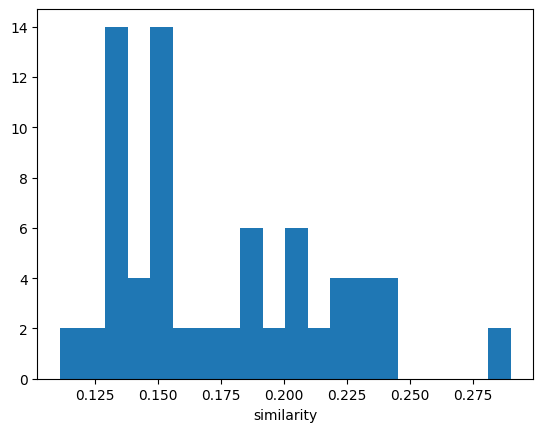

In [97]:
plt.hist(simhist,bins=20)
plt.xlabel('similarity')

In [98]:
def assignPointsToClusters(picks,fps):
    clusters = defaultdict(list)
    for i,idx in enumerate(picks):
        clusters[i].append(idx)
    sims = np.zeros((len(picks),len(fps)))
    for i in range(len(picks)):
        pick = picks[i]
        sims[i,:] = DataStructs.BulkTanimotoSimilarity(fps[pick],fps)
        sims[i,i] = 0
    best = np.argmax(sims,axis=0)
    for i,idx in enumerate(best):
        if i not in picks:
            clusters[idx].append(i)
    return clusters

In [99]:
clusters = assignPointsToClusters(picks, listaFp)

In [100]:
cluster_labels = [None] * len(lista)
for cluster_id, indices in clusters.items():
    for idx in indices:
        cluster_labels[idx] = cluster_id
cluster_labels

[0,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 2,
 3,
 0,
 0,
 4,
 4,
 4,
 5,
 3,
 3,
 6,
 6,
 6,
 1,
 1,
 3,
 3,
 3,
 3,
 2,
 7,
 1,
 1,
 1,
 5,
 4,
 1,
 4,
 8,
 0,
 3,
 8]

In [101]:
data = []
for cluster_id, indices in clusters.items():
    for idx in indices:
        if idx < len(lista) and idx < len(coords):
            smiles = lista[idx]
            x, y = coords[idx]
            data.append({'smiles': smiles, 'x': x, 'y': y, 'cluster': cluster_labels[idx]})

df_clusters = pd.DataFrame(data)
df_clusters

,smiles,x,y,cluster
0,COc1ncc(-n2nc3c(c2C(C)C)[C@@H](c2ccc(Cl)cc2C)N...,0.994933,-3.668455,0
1,COc1ccccc1-n1nc2c(c1C(C)C)C(c1ccc(Cl)cc1C)N(c1...,0.994168,-3.674778,0
2,Cc1cc(Cl)ccc1C1c2c(nn(CCc3ccccn3)c2C(C)C)C(=O)...,0.990527,-3.676072,0
3,C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2cc...,0.949164,-3.636607,1
4,CCS(=O)(=O)C[C@H](C1CC1)N1C(=O)[C@@](C)(CC(=O)...,0.951003,-3.656335,1
5,CC[C@@H](CN1CC(C)(C)OC1=O)N1C(=O)[C@@](C)(CC(=...,0.935908,-3.684750,1
6,CN(C[C@H](C1CC1)N1C(=O)[C@@](C)(CC(=O)O)C[C@H]...,0.942618,-3.653265,1
7,C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2cc...,0.926006,-3.677452,1
8,CC[C@@H](CCC#N)N1C(=O)[C@@H](CC(=O)O)C[C@H](c2...,0.932577,-3.656073,1
9,CC[C@@H](C(=O)OC(C)(C)C)N1C(=O)[C@@H](CC(=O)O)...,0.990860,-3.628047,1


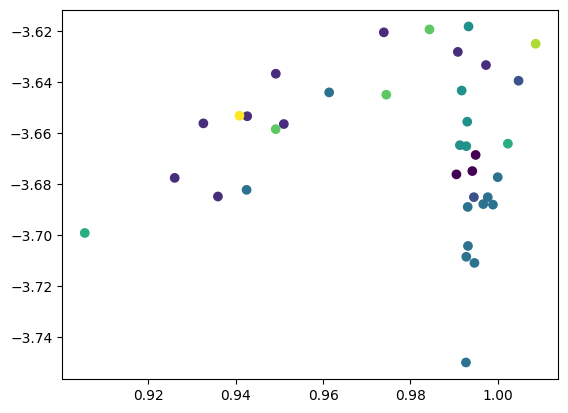

In [104]:
x = df_clusters["x"]
y = df_clusters["y"]

plt.scatter(x, y, c=df_clusters["cluster"])
plt.show()

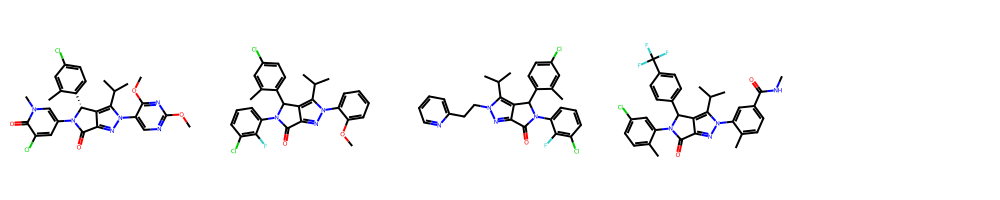

Cluster 0 (4 molecules)


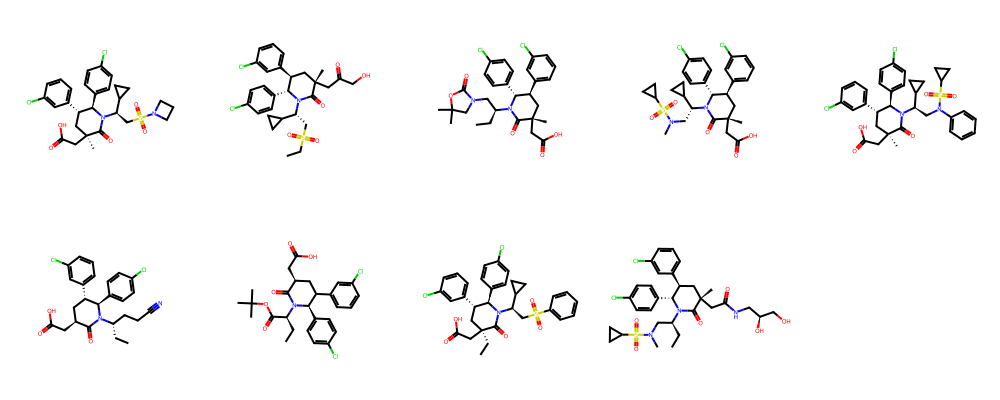

Cluster 1 (9 molecules)


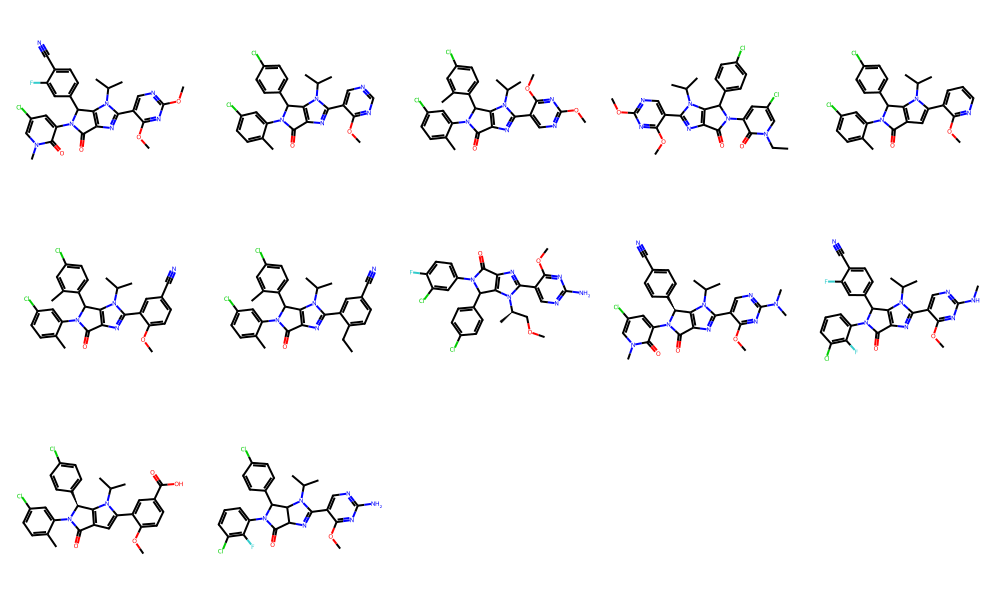

Cluster 3 (12 molecules)


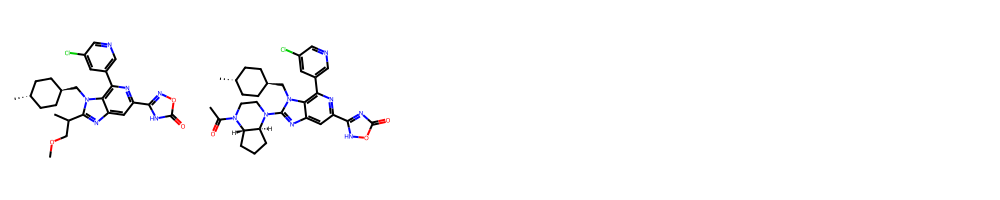

Cluster 2 (2 molecules)


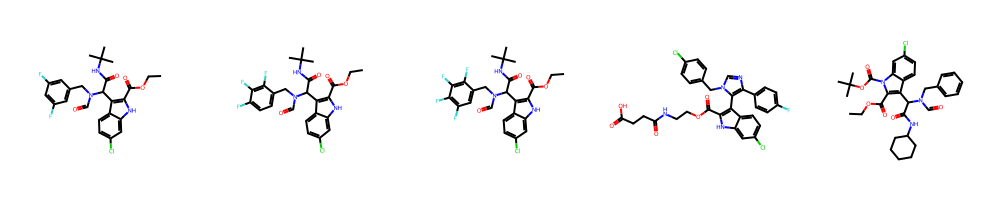

Cluster 4 (5 molecules)


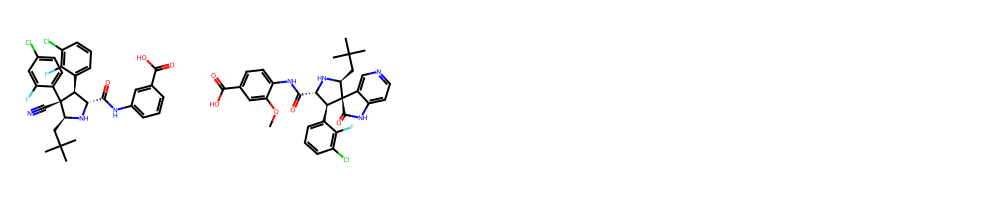

Cluster 5 (2 molecules)


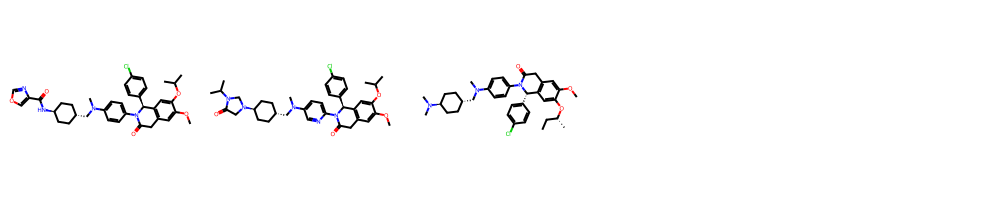

Cluster 6 (3 molecules)


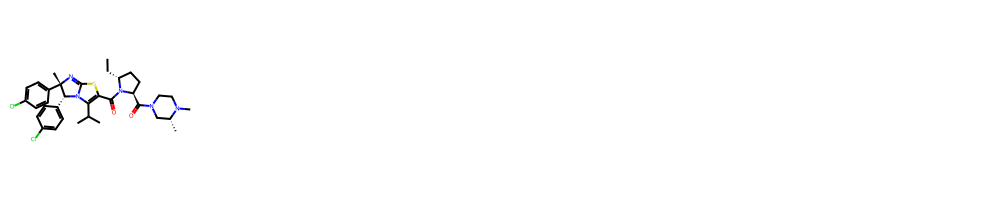

Cluster 7 (1 molecules)


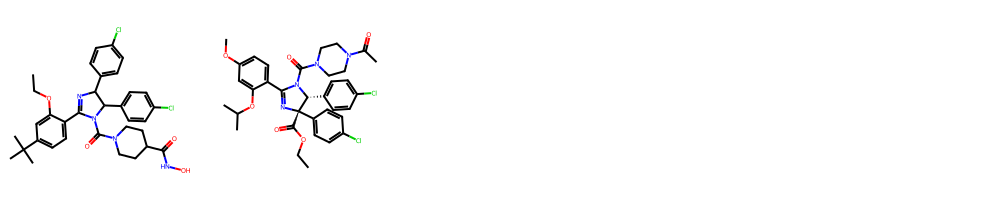

Cluster 8 (2 molecules)


In [103]:
cluster_to_indices = {}
for idx, cluster_id in enumerate(cluster_labels):
    if cluster_id not in cluster_to_indices:
        cluster_to_indices[cluster_id] = []
    cluster_to_indices[cluster_id].append(idx)

for cluster_id, indices in cluster_to_indices.items():
    mols = [listaC[i] for i in indices]
    img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200,200))
    display(img)
    print(f"Cluster {cluster_id} ({len(indices)} molecules)")